In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
concatenated_dataset = pd.read_csv("D:/IIT/2 nd Year/2nd Sem/Data Engineering/Course Work/HCHO_Prediction/preprocessed dataset/concatenated_dataset.csv")
concatenated_dataset

,HCHO Reading,Location,Current Date,Next Date
0,0.000263,"Deniyaya, Matara",2019-01-01,2019-01-02
1,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02
2,0.000263,Colombo Proper,2019-01-02,2019-01-03
3,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
4,0.000006,Nuwara Eliya Proper,2019-01-02,2019-01-03
...,...,...,...,...
12774,0.000158,Kurunegala Proper,2023-12-30,2023-12-31
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31
12776,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12777,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(concatenated_dataset['HCHO Reading'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Based on the p-value, decide on stationarity
if adf_test[1] > 0.05:
    print("The series is likely non-stationary and may need differencing.")
else:
    print("The series is likely stationary.")

ADF Statistic: -11.904442
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is likely stationary.


In [4]:
# Convert 'Current Date' to datetime and set as index
concatenated_dataset['Current Date'] = pd.to_datetime(concatenated_dataset['Current Date'])
concatenated_dataset.set_index('Current Date', inplace=True)

# Output the first few rows and the index to verify changes
df_head_after = concatenated_dataset.head()
df_index_info = concatenated_dataset.index

df_head_after, df_index_info

(              HCHO Reading             Location   Next Date
 Current Date                                               
 2019-01-01        0.000263     Deniyaya, Matara  2019-01-02
 2019-01-01        0.000263  Nuwara Eliya Proper  2019-01-02
 2019-01-02        0.000263       Colombo Proper  2019-01-03
 2019-01-02        0.000006     Deniyaya, Matara  2019-01-03
 2019-01-02        0.000006  Nuwara Eliya Proper  2019-01-03,
 DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-02', '2019-01-02',
                '2019-01-02', '2019-01-03', '2019-01-03', '2019-01-03',
                '2019-01-04', '2019-01-04',
                ...
                '2023-12-28', '2023-12-29', '2023-12-29', '2023-12-29',
                '2023-12-30', '2023-12-30', '2023-12-30', '2023-12-31',
                '2023-12-31', '2023-12-31'],
               dtype='datetime64[ns]', name='Current Date', length=12779, freq=None))

# Bibile, Monaragala

In [5]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Bibile, Monaragala']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.76199575742392
p-value: 5.644236217874078e-07


In [6]:
# Selecting the data for the model
monaragala_data = concatenated_dataset[concatenated_dataset['Location'] == 'Bibile, Monaragala']['HCHO Reading']

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(monaragala_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14547.849
Date:                Fri, 19 Apr 2024   AIC                         -29087.698
Time:                        19:01:23   BIC                         -29065.661
Sample:                    01-02-2019   HQIC                        -29079.569
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.89e-06     41.430      0.000       0.000       0.000
ar.L1          0.5507   2.41e-11   2.28e+10      0.000       0.551       0.551
ma.L1         -0.3414    1.9e-11  -1.79e+10      0.000      -0.341      -0.341
sigma2      6.976e-09   2.34e-10     29.817      0.000    6.52e-09    7.44e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                12.44
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.18
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+26. Standard errors may be unstable.
"""

In [8]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000117
2024-01-02    0.000118
2024-01-03    0.000119
2024-01-04    0.000119
2024-01-05    0.000119
2024-01-06    0.000120
2024-01-07    0.000120
2024-01-08    0.000120
2024-01-09    0.000120
2024-01-10    0.000120
Freq: D, Name: predicted_mean, dtype: float64

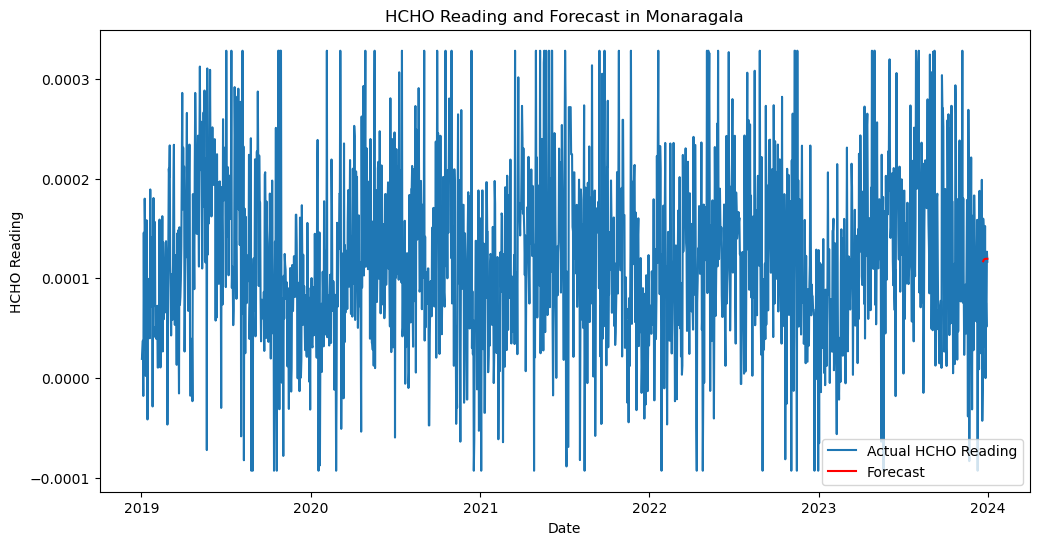

In [9]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monaragala_data, label='Actual HCHO Reading')
plt.plot(monaragala_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [10]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(monaragala_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 3.564409949806097e-09


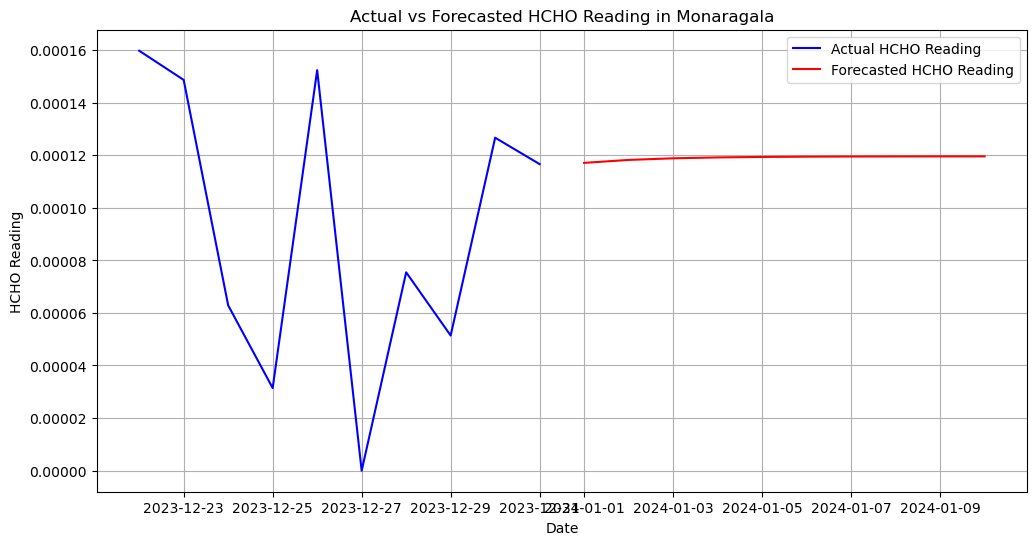

In [11]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monaragala_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Colombo

In [12]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Colombo Proper']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.611683169129043
p-value: 0.0001229141838521046


In [13]:
# Selecting the data for the model
colombo_data = concatenated_dataset[concatenated_dataset['Location'] == 'Colombo Proper']['HCHO Reading']

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(colombo_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14445.519
Date:                Fri, 19 Apr 2024   AIC                         -28883.037
Time:                        19:01:25   BIC                         -28861.000
Sample:                             0   HQIC                        -28874.908
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.26e-06     22.751      0.000       0.000       0.000
ar.L1          0.8619   2.21e-10   3.89e+09      0.000       0.862       0.862
ma.L1         -0.5768    8.2e-11  -7.03e+09      0.000      -0.577      -0.577
sigma2      7.733e-09   2.38e-10     32.536      0.000    7.27e-09     8.2e-09
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                17.53
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.07
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.09e+25. Standard errors may be unstable.
"""

In [15]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1825    0.000167
1826    0.000163
1827    0.000161
1828    0.000158
1829    0.000156
1830    0.000154
1831    0.000152
1832    0.000151
1833    0.000150
1834    0.000149
Name: predicted_mean, dtype: float64

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


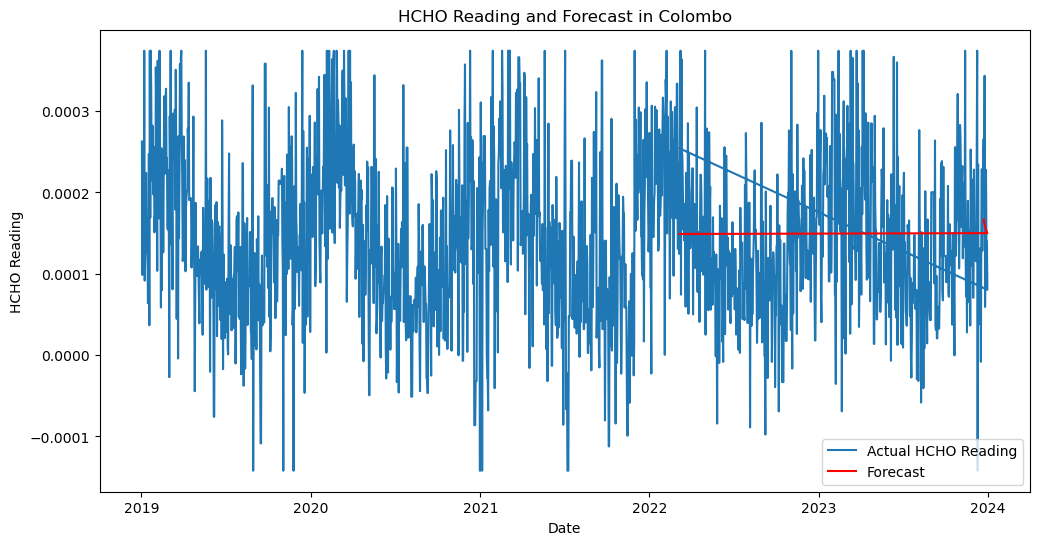

In [16]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(colombo_data, label='Actual HCHO Reading')
plt.plot(colombo_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Colombo')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [17]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(colombo_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 7.641233549745258e-09


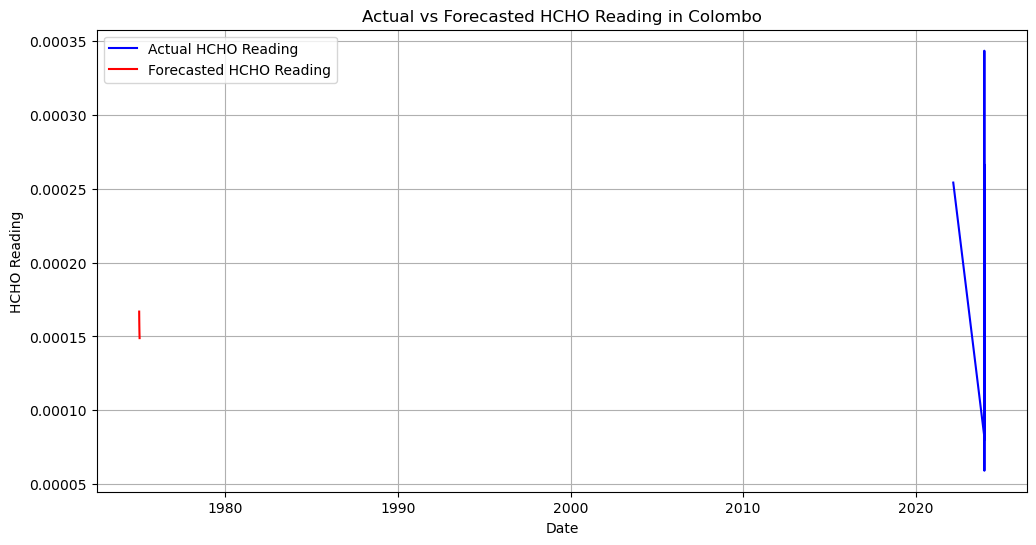

In [18]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(colombo_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Colombo')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Deniyaya, Matara

In [19]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Deniyaya, Matara']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.448708314088336
p-value: 5.7462105208365706e-11


In [20]:
# Selecting the data for the model
matara_data = concatenated_dataset[concatenated_dataset['Location'] == 'Deniyaya, Matara']['HCHO Reading']

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(matara_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14405.891
Date:                Fri, 19 Apr 2024   AIC                         -28803.783
Time:                        19:01:26   BIC                         -28781.743
Sample:                             0   HQIC                        -28795.653
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.73e-06     30.107      0.000       0.000       0.000
ar.L1          0.6797    7.8e-11   8.71e+09      0.000       0.680       0.680
ma.L1         -0.4514   4.85e-11  -9.31e+09      0.000      -0.451      -0.451
sigma2      8.212e-09   2.51e-10     32.662      0.000    7.72e-09     8.7e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                76.63
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.39
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+26. Standard errors may be unstable.
"""

In [22]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1826    0.000092
1827    0.000099
1828    0.000103
1829    0.000106
1830    0.000108
1831    0.000109
1832    0.000110
1833    0.000111
1834    0.000111
1835    0.000112
Name: predicted_mean, dtype: float64

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


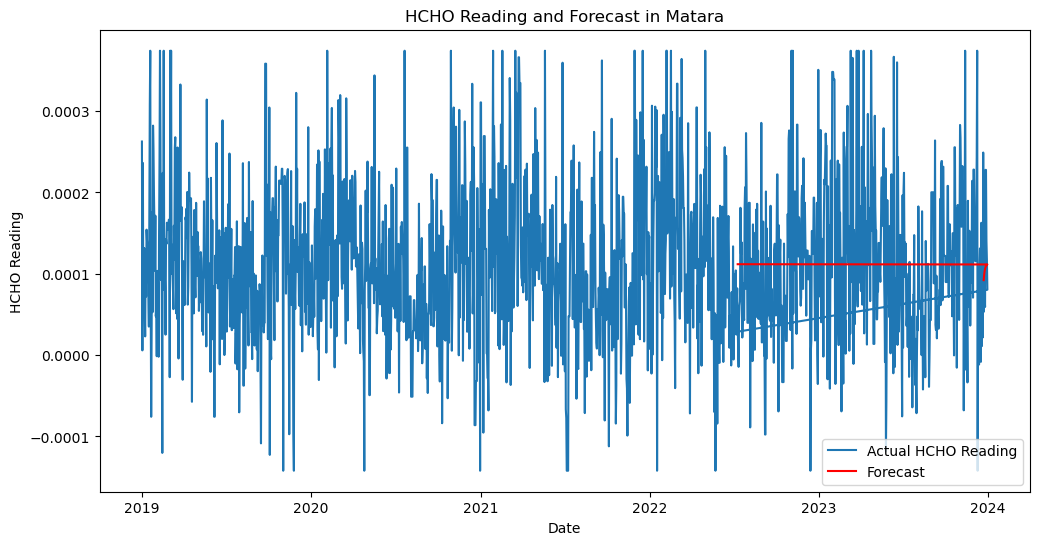

In [23]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(matara_data, label='Actual HCHO Reading')
plt.plot(matara_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Matara')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [24]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(matara_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 4.299447343319634e-09


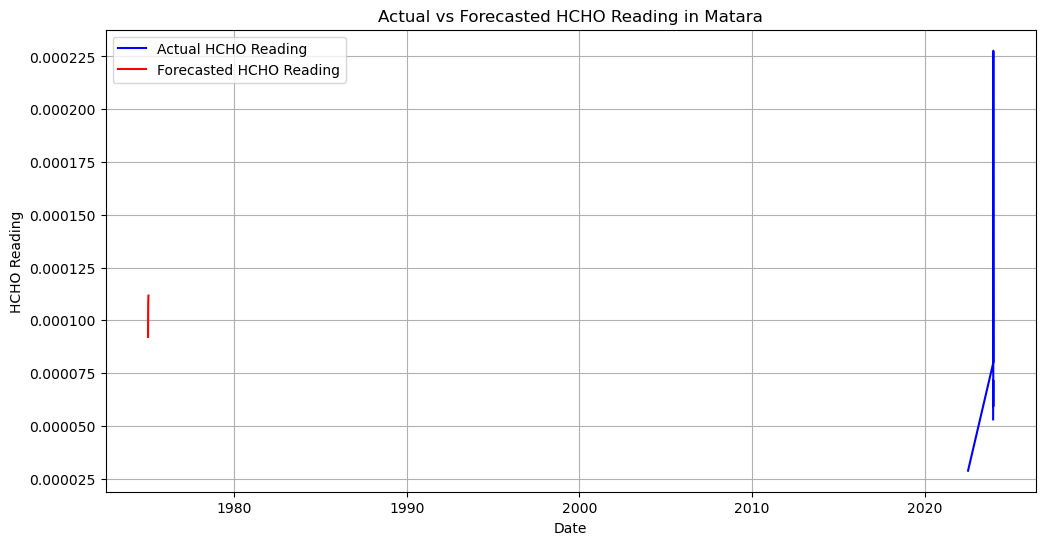

In [25]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(matara_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Matara')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Jaffna

In [26]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Jaffna Proper']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -9.944687024827527
p-value: 2.60840437862528e-17


In [27]:
# Selecting the data for the model
jaffna_data = concatenated_dataset[concatenated_dataset['Location'] == 'Jaffna Proper']['HCHO Reading']

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(jaffna_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14779.503
Date:                Fri, 19 Apr 2024   AIC                         -29551.006
Time:                        19:01:28   BIC                         -29528.967
Sample:                    01-01-2019   HQIC                        -29542.877
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.36e-06     46.575      0.000       0.000       0.000
ar.L1          0.3686    3.1e-11   1.19e+10      0.000       0.369       0.369
ma.L1         -0.1645   2.82e-11  -5.84e+09      0.000      -0.164      -0.164
sigma2       5.46e-09   1.72e-10     31.721      0.000    5.12e-09     5.8e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                82.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.39
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+26. Standard errors may be unstable.
"""

In [29]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000101
2024-01-02    0.000106
2024-01-03    0.000109
2024-01-04    0.000109
2024-01-05    0.000110
2024-01-06    0.000110
2024-01-07    0.000110
2024-01-08    0.000110
2024-01-09    0.000110
2024-01-10    0.000110
Freq: D, Name: predicted_mean, dtype: float64

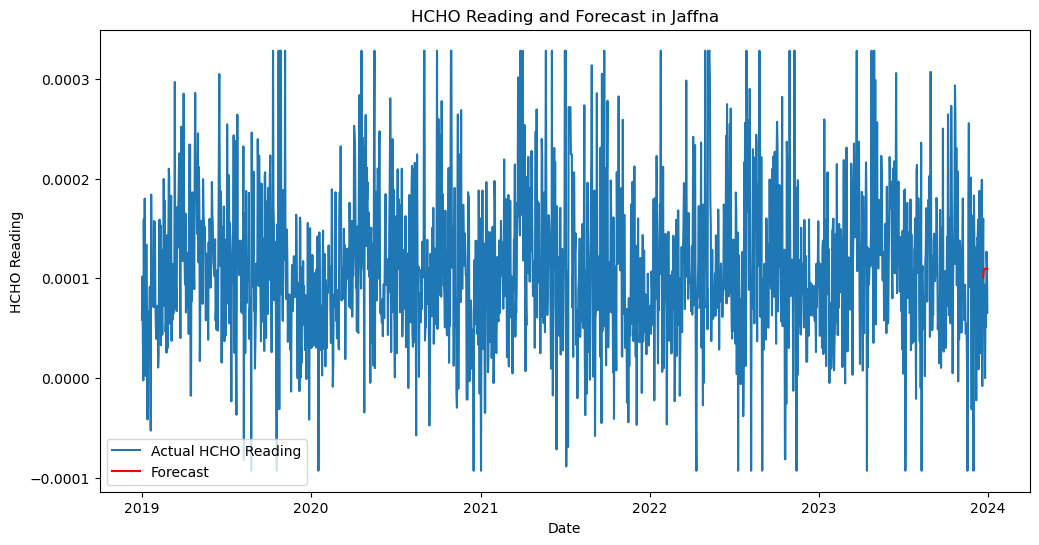

In [30]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(jaffna_data, label='Actual HCHO Reading')
plt.plot(jaffna_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Jaffna')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [31]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(jaffna_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.493203442875474e-09


In [32]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(jaffna_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.493203442875474e-09


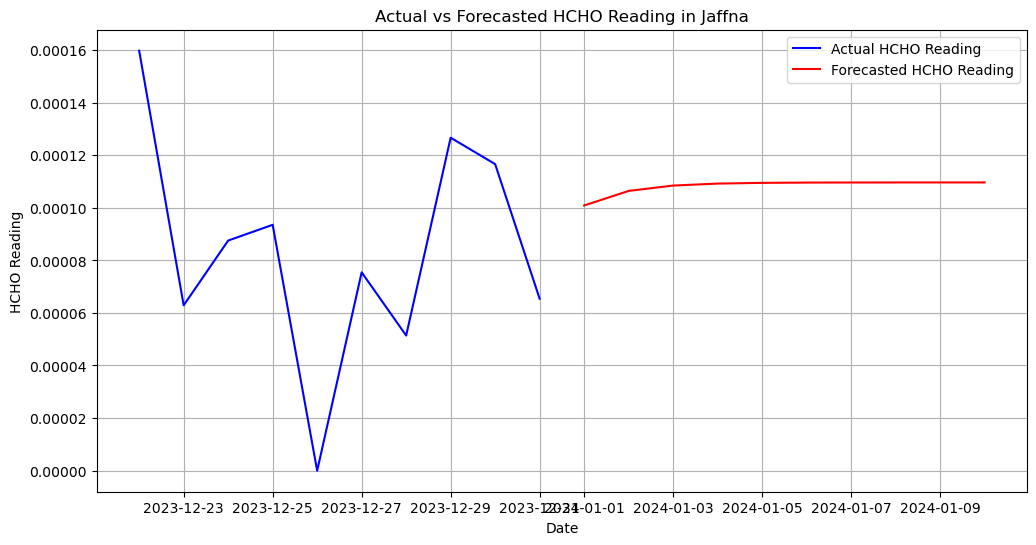

In [33]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(jaffna_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Jaffna')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Kandy

In [34]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Kandy Proper']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -8.496931388168434
p-value: 1.2684624705085183e-13


In [35]:
# Selecting the data for the model
kandy_data = concatenated_dataset[concatenated_dataset['Location'] == 'Kandy Proper']['HCHO Reading']

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(kandy_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14802.826
Date:                Fri, 19 Apr 2024   AIC                         -29597.651
Time:                        19:01:29   BIC                         -29575.614
Sample:                    01-02-2019   HQIC                        -29589.522
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.825e-05   4.22e-06     23.302      0.000       9e-05       0.000
ar.L1          0.6411   3.83e-11   1.67e+10      0.000       0.641       0.641
ma.L1         -0.1113   1.86e-11  -5.97e+09      0.000      -0.111      -0.111
sigma2      5.275e-09   1.38e-10     38.346      0.000    5.01e-09    5.54e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               241.52
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.72e+26. Standard errors may be unstable.
"""

In [37]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000073
2024-01-02    0.000082
2024-01-03    0.000088
2024-01-04    0.000092
2024-01-05    0.000094
2024-01-06    0.000096
2024-01-07    0.000096
2024-01-08    0.000097
2024-01-09    0.000098
2024-01-10    0.000098
Freq: D, Name: predicted_mean, dtype: float64

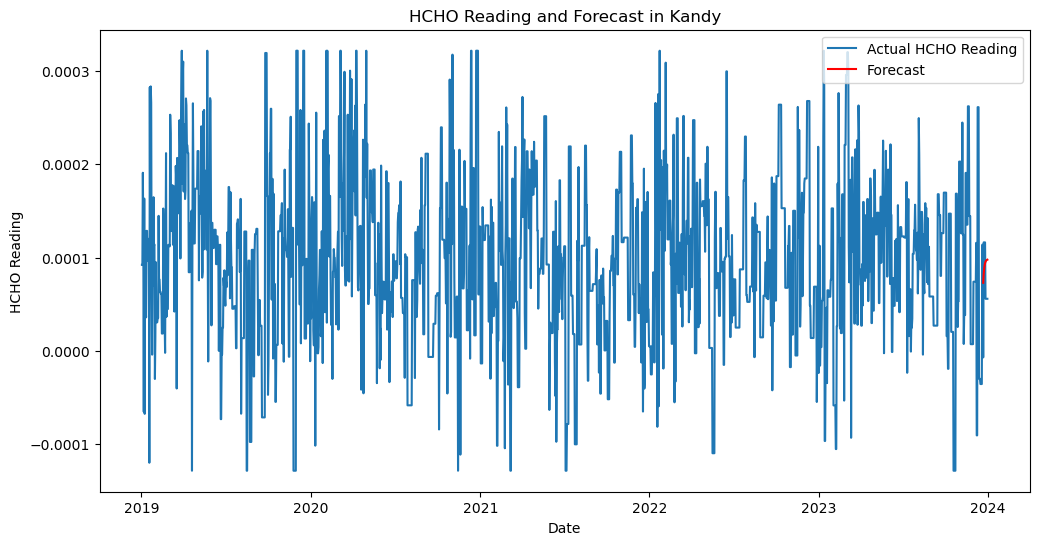

In [38]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(kandy_data, label='Actual HCHO Reading')
plt.plot(kandy_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Kandy')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [39]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(kandy_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.7878452330061828e-09


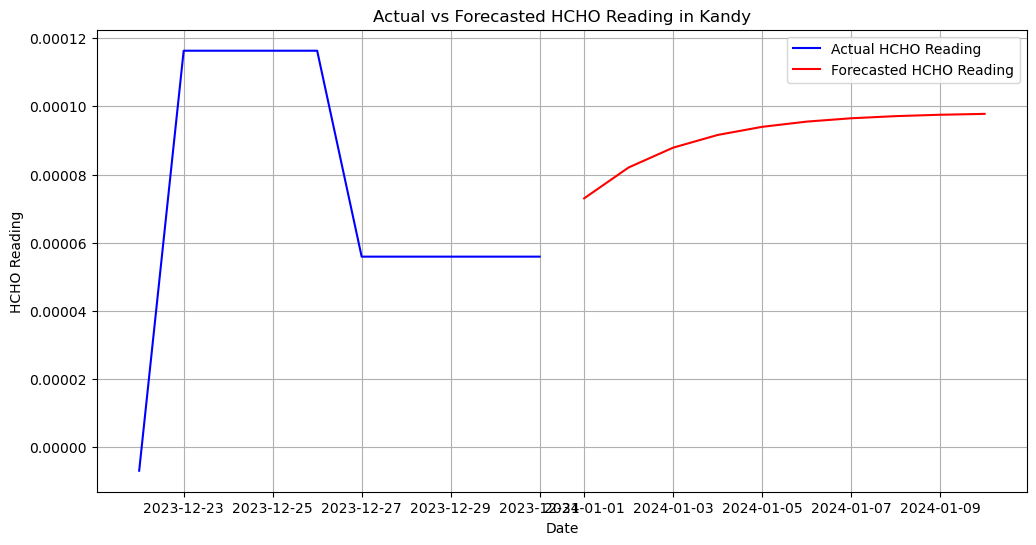

In [40]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(kandy_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Kandy')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Kurunegala

In [41]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Kurunegala Proper']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.863417876218934
p-value: 1.581190811331477e-09


In [42]:
# Selecting the data for the model
kurunegla_data = concatenated_dataset[concatenated_dataset['Location'] == 'Kurunegala Proper']['HCHO Reading']

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(kurunegla_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14586.029
Date:                Fri, 19 Apr 2024   AIC                         -29164.057
Time:                        19:01:30   BIC                         -29142.018
Sample:                    01-01-2019   HQIC                        -29155.928
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.72e-06     46.402      0.000       0.000       0.000
ar.L1          0.4439    3.4e-11    1.3e+10      0.000       0.444       0.444
ma.L1         -0.2177   2.95e-11  -7.37e+09      0.000      -0.218      -0.218
sigma2      6.759e-09    2.3e-10     29.422      0.000    6.31e-09    7.21e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.46
Prob(Q):                              0.92   Prob(JB):                         0.04
Heteroskedasticity (H):               0.92   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.46e+26. Standard errors may be unstable.
"""

In [44]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000114
2024-01-02    0.000121
2024-01-03    0.000124
2024-01-04    0.000125
2024-01-05    0.000126
2024-01-06    0.000126
2024-01-07    0.000126
2024-01-08    0.000126
2024-01-09    0.000126
2024-01-10    0.000126
Freq: D, Name: predicted_mean, dtype: float64

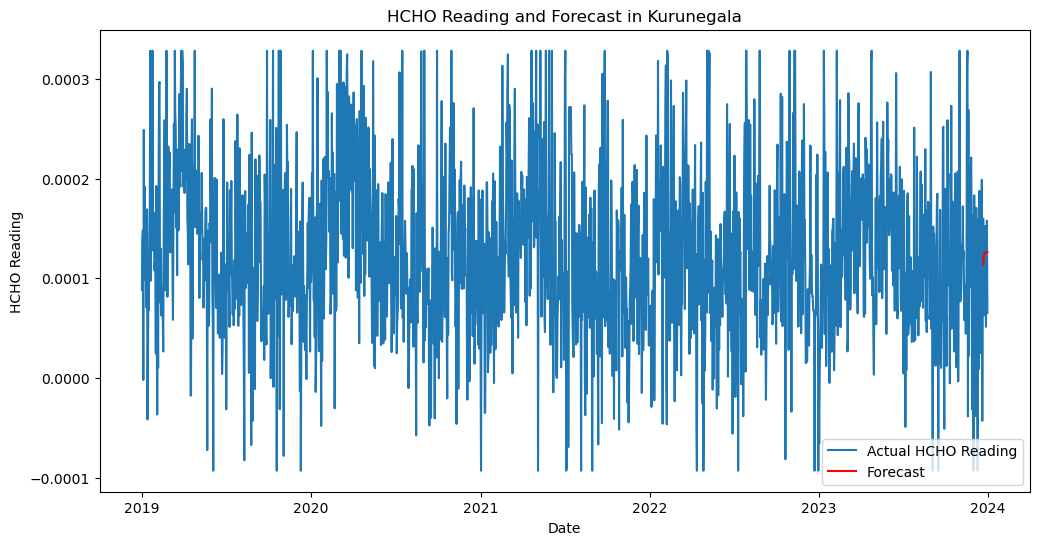

In [45]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(kurunegla_data, label='Actual HCHO Reading')
plt.plot(kurunegla_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Kurunegala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [46]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(kurunegla_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.1324447562763772e-09


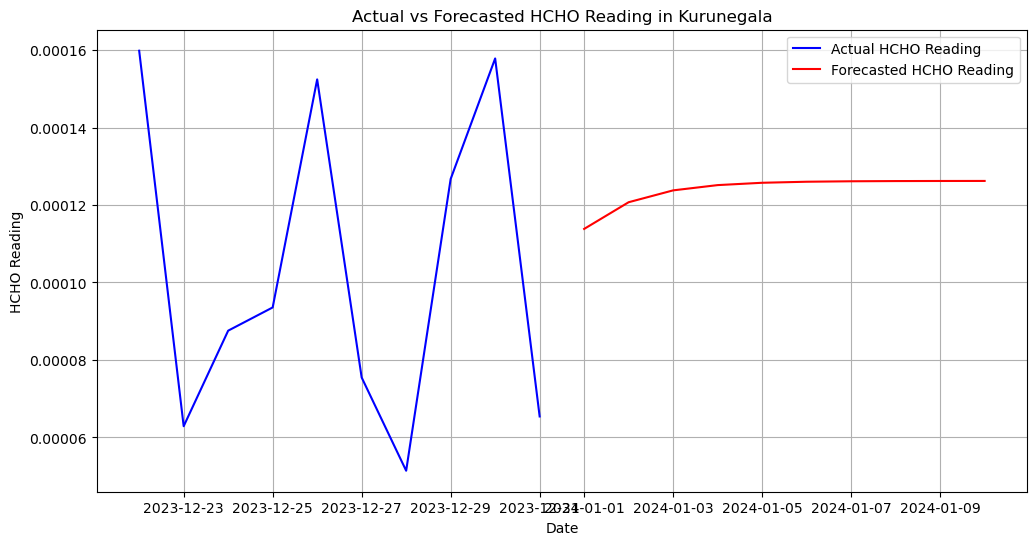

In [47]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(kurunegla_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Kurunegala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()

# Nuwara Eliya

In [48]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_dataset[concatenated_dataset['Location'] == 'Nuwara Eliya Proper']['HCHO Reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -20.112650642224786
p-value: 0.0


In [49]:
# Selecting the data for the model
nuwara_eliya_data = concatenated_dataset[concatenated_dataset['Location'] == 'Nuwara Eliya Proper']['HCHO Reading']

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(nuwara_eliya_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14399.693
Date:                Fri, 19 Apr 2024   AIC                         -28791.387
Time:                        19:01:31   BIC                         -28769.347
Sample:                    01-01-2019   HQIC                        -28783.257
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.02e-06     34.372      0.000    9.79e-05       0.000
ar.L1          0.4656   3.22e-11   1.45e+10      0.000       0.466       0.466
ma.L1         -0.2541   2.94e-11  -8.64e+09      0.000      -0.254      -0.254
sigma2      8.271e-09   2.65e-10     31.195      0.000    7.75e-09    8.79e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                33.73
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.28
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+25. Standard errors may be unstable.
"""

In [51]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000101
2024-01-02    0.000102
2024-01-03    0.000103
2024-01-04    0.000103
2024-01-05    0.000104
2024-01-06    0.000104
2024-01-07    0.000104
2024-01-08    0.000104
2024-01-09    0.000104
2024-01-10    0.000104
Freq: D, Name: predicted_mean, dtype: float64

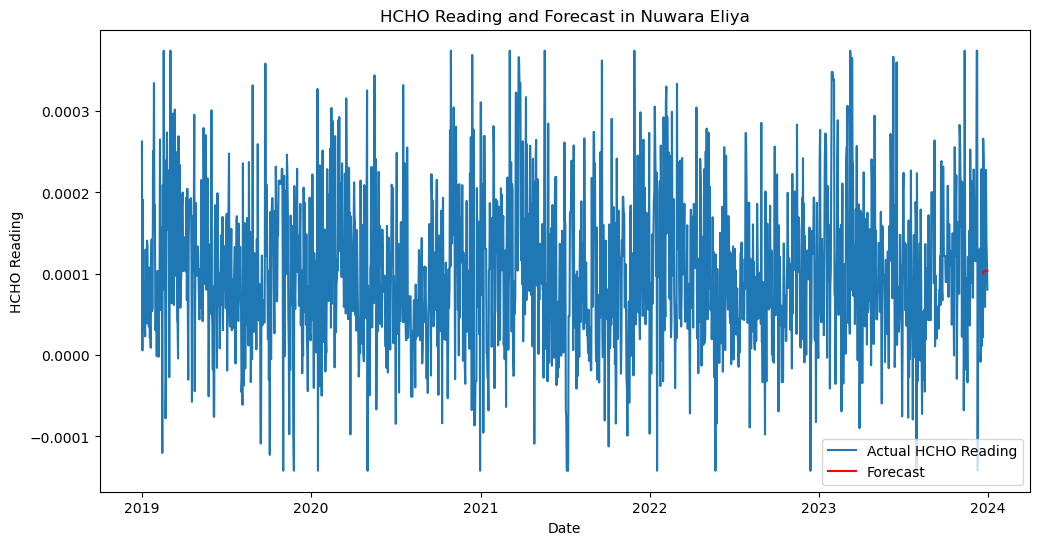

In [52]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(nuwara_eliya_data, label='Actual HCHO Reading')
plt.plot(nuwara_eliya_data.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Nuwara Eliya')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [53]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(nuwara_eliya_data[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 8.285971757036633e-09


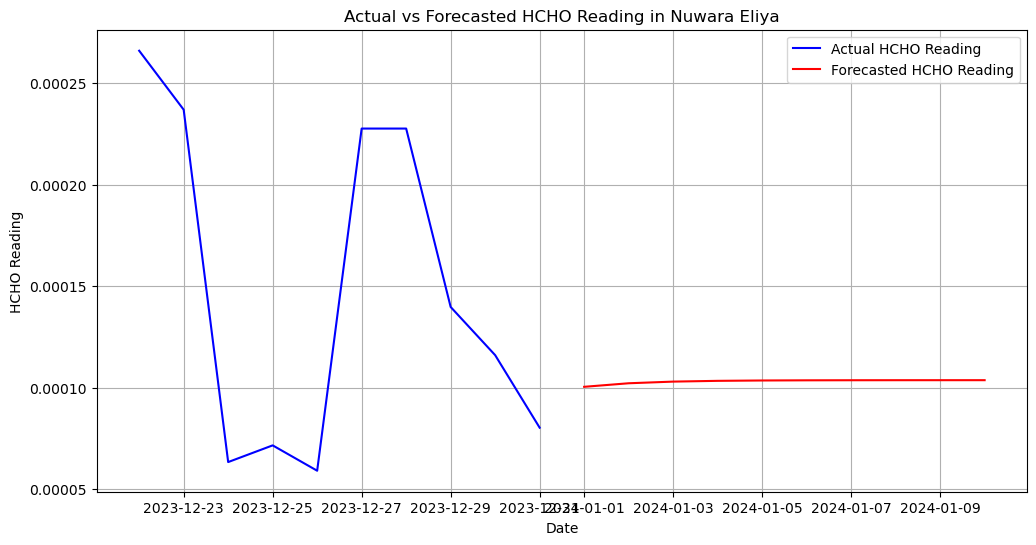

In [54]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nuwara_eliya_data[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Nuwara Eliya')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.legend()
plt.show()